# **EVALUACION 1 MINERIA DE DATOS 2024 (BIY7121_004V) - STARCRAFT II**

Alumno: **Cristóbal Cabezas Espinoza**

In [19]:
# Importamos librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## **1. BUSSINESS UNDERSTANDING**

### 1.1. **Contexto** 


Se nos ha entregado un dataset correspondiente a información de partidas multijugador de Starcraft II, juego RTS (Real Time Strategy) lanzado en 2010 como una secuela del juego lanzado originalmente en 1998. El dataset contiene información de diferentes partidas con infromación relevante de cada uno de estos, tales como la edad de jugadores, horas jugadas, acciones por minutos, etc. 

### 1.2. **Definición de columnas**


* **GameID** *(entero)*: Número de identificación único para cada partido (entero)
* **LeagueIndex** *(ordinal)*: Ligas Bronze, Silver, Gold, Platinum, Diamond, Master, GrandMaster y Professional, codificadas del 1 al 8.
* **Age** *(entero)*: Edad de cada jugador.
* **HoursPerWeek** *(entero)*: Horas de juego semanales declaradas.
* **TotalHours** *(entero)*: Total de horas de juego declaradas.
* **APM** *(continuo)*: Acciones por minuto.
* **SelectByHotkeys** *(continuo)*: Número de selecciones de unidades o edificios realizadas mediante teclas de acceso rápido por marca de tiempo.
* **AssignToHotkeys** *(continuo)*: Número de unidades o edificios asignados a teclas de acceso rápido por marca de tiempo. 
* **UniqueHotkeys** *(continuo)*: Número de teclas de acceso rápido utilizadas por marca de tiempo.
* **MinimapAttacks** *(continuo)*: Número de acciones de ataque en el minimapa por marca de tiempo.
* **MinimapRightClicks** *(continuo)*: número de clics con el botón derecho en el minimapa por marca de tiempo.
* **NumberOfPACs** *(continuo)*: Número de Perception Action Cycles (PAC) por marca de tiempo.
* **GapBetweenPACs** *(continuo)*: Duración media en milisegundos entre PACs.
* **ActionLatency** *(continuo)*: Latencia media desde el inicio de un PAC hasta su primera acción en milisegundos.
* **ActionsInPAC** *(continuo)*: Número medio de acciones dentro de cada PAC.
* **TotalMapExplored** *(continuo)*: El número de cuadrículas de coordenadas de juego de 24x24 vistas por el jugador por marca de tiempo.
* **WorkersMade** *(continuo)*: Número de SCV, drones y sondas entrenados por marca de tiempo.
* **UniqueUnitsMade** *(continuo)*: Unidades únicas fabricadas por marca de tiempo.
* **ComplexUnitsMade** *(continuo)*: Número de fantasmas, infestadores y altos templarios entrenados por marca de tiempo.
* **ComplexAbilitiesUsed** *(continuo)*: Habilidades que requieren instrucciones de puntería específicas utilizadas por marca de tiempo.

**NOTA:** Perception Action Cycles (PAC) es una medición utilizada en los juegos RTS para calcular la latencia o tiempo de reacción entre mover la pantalla y la acción a realizar (por ejemplo, mover un jugador, construir un edificio, etc.). Un jugador más experimentado es capaz de realizar un mayor número de PACs por un intervalo o marca de tiempo.

In [20]:
# Cargamos el dataset
sc2DF = pd.read_csv("starcraft_duoc.csv", delimiter=';')

## **2. DATA UNDERSTANDING**

In [21]:
# Numero total de filas y columnas, respectivamente
sc2DF.shape

(3395, 20)

In [22]:
# Mostramos los primeros 5 registros
sc2DF.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,52,5,27.0,10.0,3000.0,143.718,0.003515159,0.000219697,0.000109849,0.000392317,0.004849,326.677,408.673,47.508,0.000220,0.0013966,4.71e-05,0,0,127448
1,55,5,23.0,10.0,5000.0,1.292.322,0.003303812,0.000259462,0.000294057,0.000432436,0.004307,329.194,423.454,48.434,0.000381,0.0011935,8.65e-05,0,0.00020757,57812
2,56,4,30.0,10.0,200.0,699.612,0.001101091,0.00033557,0.000293624,0.000461409,0.002926,446.475,753.548,4.043,0.000231,0.00074455,6.29e-05,0,0.00018876,95360
3,57,3,19.0,20.0,400.0,1.076.016,0.001033542,0.000213101,5.33e-05,0.000543409,0.003783,292.203,537.352,49.155,0.000202,0.0004262,7.46e-05,0,0.00038358,93852
4,58,3,32.0,10.0,500.0,1.228.908,0.001136014,0.000327326,0,0.001328558,0.002368,226.885,620.813,9.374,0.000289,0.0011745,7.7e-05,0,1.93e-05,51936


In [23]:
# Los ultimos 5 registros
sc2DF.tail()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
3390,10089,8,NaN,NaN,NaN,2.596.296,0.020425314,0.00074296,0.000621163,0.000146156,0.004555,186.059,428.342,62.754,0.000560,0.00087694,6.09e-05,0,0,82104
3391,10090,8,NaN,NaN,NaN,314.67,0.028043136,0.001157179,0.000246208,0.001083317,0.004259,143.023,361.156,71.965,0.000394,0.00078787,9.85e-05,0,0,40616
3392,10092,8,NaN,NaN,NaN,2.994.282,0.028341014,0.000860215,0.000337942,0.000168971,0.004439,124.028,395.156,63.979,0.000292,0.0012596,6.14e-05,0,0,65100
3393,10094,8,NaN,NaN,NaN,3.758.664,0.036435894,0.000594265,0.000204279,0.000779973,0.004346,11.691,348.547,79.615,0.000279,0.00061284,0.000111425,0,0.00063141,53848
3394,10095,8,NaN,NaN,NaN,3.483.576,0.029854921,0.000811174,0.000223772,0.001314661,0.005566,200.537,335.142,63.719,0.000252,0.0015664,6.53e-05,0.000456868,0.00089509,107252


In [24]:
# Resumen estadístico de nuestras columnas
sc2DF.describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,NumberOfPACs,ActionsInPAC,TotalMapExplored,MaxTimeStamp
count,3395.000000,3395.000000,3340.000000,3339.000000,3338.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,21.647904,15.910752,960.421809,0.003463,47.216492,0.000283,83598.229161
std,2719.944851,1.517327,4.206341,11.962912,17318.133922,0.000992,20.604812,0.000087,33497.667966
min,52.000000,1.000000,16.000000,0.000000,3.000000,0.000679,2.454000,0.000091,25224.000000
25%,2464.500000,3.000000,19.000000,8.000000,300.000000,0.002754,38.993500,0.000224,60090.000000
50%,4874.000000,4.000000,21.000000,12.000000,500.000000,0.003395,48.797000,0.000270,81012.000000
75%,7108.500000,5.000000,24.000000,20.000000,800.000000,0.004027,58.717500,0.000325,102074.000000
max,10095.000000,8.000000,44.000000,168.000000,1000000.000000,0.007971,185.581000,0.000832,388032.000000


In [25]:
# Una vista a los tipos de datos de cada una de las columnas
sc2DF.dtypes

GameID                  int64
LeagueIndex             int64
Age                   float64
HoursPerWeek          float64
TotalHours            float64
APM                    object
SelectByHotkeys        object
AssignToHotkeys        object
MinimapAttacks         object
MinimapRightClicks     object
NumberOfPACs          float64
GapBetweenPACs         object
ActionLatency          object
ActionsInPAC          float64
TotalMapExplored      float64
WorkersMade            object
UniqueUnitsMade        object
ComplexUnitsMade       object
ComplexAbilityUsed     object
MaxTimeStamp            int64
dtype: object

De esta revisión es posible observar lo siguiente:
* Se da cuenta de que si bien existe una variable categórica en nuestro dataset (LeagueIndex), este ya se encuentra categorizada con números enteros, por lo que no es necesario realizar un proceso de encoding en este trabajo.
* Sin embargo, podemos observar que muchas columnas de nuestro dataset presentan problemas de formato. Dicho de otro modo, es posible notar que hay números, sean enteros (int) o decimales (float), que están bajo formato de texto (string). Se hace necesario, por tanto, hacer un tratamiento para darles el formato correcto.

In [26]:
# Antes que todo, eliminamos columna GameID
sc2DF = sc2DF.drop('GameID', axis=1)

In [27]:
# Con este loop vamos a eliminar los puntos que nos impidan transformar los strings en variables float
# Asimismo, convertiremos las comas de los números decimales en puntos para poder convertirlos en variables float
for column in sc2DF.columns:
    if isinstance(sc2DF[column], object):
        for row in range(len(sc2DF)):
            try:
                if isinstance(sc2DF[column][row], str):
                    if sc2DF[column][row][-4] == '.':
                        sc2DF.loc[row, column] = sc2DF[column][row].replace('.', '')
                    if sc2DF[column][row][1] == ',':
                        sc2DF.loc[row, column] = sc2DF[column][row].replace(',', '.')
            except:
                pass

In [28]:
# Hecho el arreglo, vamos a transformar las columnas object a float
object_columns = sc2DF.select_dtypes(include='object').columns
sc2DF[object_columns] = sc2DF[object_columns].astype(float)

In [29]:
# Desplegamos por pantalla los resultados
sc2DF.dtypes

LeagueIndex             int64
Age                   float64
HoursPerWeek          float64
TotalHours            float64
APM                   float64
SelectByHotkeys       float64
AssignToHotkeys       float64
MinimapAttacks        float64
MinimapRightClicks    float64
NumberOfPACs          float64
GapBetweenPACs        float64
ActionLatency         float64
ActionsInPAC          float64
TotalMapExplored      float64
WorkersMade           float64
UniqueUnitsMade       float64
ComplexUnitsMade      float64
ComplexAbilityUsed    float64
MaxTimeStamp            int64
dtype: object

In [30]:
# Exploramos los 5 primeros valores resultanes
sc2DF.head()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,5,27.0,10.0,3000.0,143718.0,0.003515,0.000220,0.000110,0.000392,0.004849,326677.0,408673.0,47.508,0.000220,0.001397,0.000047,0.0,0.000000,127448
1,5,23.0,10.0,5000.0,1292322.0,0.003304,0.000259,0.000294,0.000432,0.004307,329194.0,423454.0,48.434,0.000381,0.001193,0.000087,0.0,0.000208,57812
2,4,30.0,10.0,200.0,699612.0,0.001101,0.000336,0.000294,0.000461,0.002926,446475.0,753548.0,4.043,0.000231,0.000745,0.000063,0.0,0.000189,95360
3,3,19.0,20.0,400.0,1076016.0,0.001034,0.000213,0.000053,0.000543,0.003783,292203.0,537352.0,49.155,0.000202,0.000426,0.000075,0.0,0.000384,93852
4,3,32.0,10.0,500.0,1228908.0,0.001136,0.000327,0.000000,0.001329,0.002368,226885.0,620813.0,9.374,0.000289,0.001174,0.000077,0.0,0.000019,51936


In [31]:
# Exploramos los 5 ultimos valores resultanes
sc2DF.tail()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
3390,8,NaN,NaN,NaN,2596296.00,0.020425,0.000743,0.000621,0.000146,0.004555,186059.0,428342.0,62.754,0.000560,0.000877,0.000061,0.000000,0.000000,82104
3391,8,NaN,NaN,NaN,314.67,0.028043,0.001157,0.000246,0.001083,0.004259,143023.0,361156.0,71.965,0.000394,0.000788,0.000098,0.000000,0.000000,40616
3392,8,NaN,NaN,NaN,2994282.00,0.028341,0.000860,0.000338,0.000169,0.004439,124028.0,395156.0,63.979,0.000292,0.001260,0.000061,0.000000,0.000000,65100
3393,8,NaN,NaN,NaN,3758664.00,0.036436,0.000594,0.000204,0.000780,0.004346,11691.0,348547.0,79.615,0.000279,0.000613,0.000111,0.000000,0.000631,53848
3394,8,NaN,NaN,NaN,3483576.00,0.029855,0.000811,0.000224,0.001315,0.005566,200537.0,335142.0,63.719,0.000252,0.001566,0.000065,0.000457,0.000895,107252


### 2.1. **Limpieza y transformación**

#### 2.1.1. **Tratamiento de valores nulos**

In [32]:
sc2DF.isna().sum()

LeagueIndex            0
Age                   55
HoursPerWeek          56
TotalHours            57
APM                    0
SelectByHotkeys        0
AssignToHotkeys        0
MinimapAttacks         0
MinimapRightClicks     0
NumberOfPACs           0
GapBetweenPACs         0
ActionLatency          0
ActionsInPAC           0
TotalMapExplored       0
WorkersMade            0
UniqueUnitsMade        0
ComplexUnitsMade       0
ComplexAbilityUsed     0
MaxTimeStamp           0
dtype: int64

In [33]:
# Vamos a imputar valores usando KNN
# Crear una instancia de KNNImputer
imputer = KNNImputer(n_neighbors=3, weights='distance') #uniform

# Imputar los valores faltantes
imputed_data = imputer.fit_transform(sc2DF)
sc2DFImputed = pd.DataFrame(imputed_data)

# Finalmente, KNN no devuelve un DataFrame con los nombres de las columnas
# por lo que debemos asignar los nombres de las columnas de forma manual
sc2DFImputed.columns = sc2DF.columns

In [34]:
# Veamos el resultado
sc2DFImputed.isna().sum()

LeagueIndex           0
Age                   0
HoursPerWeek          0
TotalHours            0
APM                   0
SelectByHotkeys       0
AssignToHotkeys       0
MinimapAttacks        0
MinimapRightClicks    0
NumberOfPACs          0
GapBetweenPACs        0
ActionLatency         0
ActionsInPAC          0
TotalMapExplored      0
WorkersMade           0
UniqueUnitsMade       0
ComplexUnitsMade      0
ComplexAbilityUsed    0
MaxTimeStamp          0
dtype: int64

In [35]:
# Exploramos los 5 ultimos valores resultanes
sc2DFImputed.tail()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
3390,8.0,18.676348,20.647304,1218.456423,2596296.00,0.020425,0.000743,0.000621,0.000146,0.004555,186059.0,428342.0,62.754,0.000560,0.000877,0.000061,0.000000,0.000000,82104.0
3391,8.0,20.907904,17.987098,1014.152504,314.67,0.028043,0.001157,0.000246,0.001083,0.004259,143023.0,361156.0,71.965,0.000394,0.000788,0.000098,0.000000,0.000000,40616.0
3392,8.0,22.134033,28.345951,1419.199360,2994282.00,0.028341,0.000860,0.000338,0.000169,0.004439,124028.0,395156.0,63.979,0.000292,0.001260,0.000061,0.000000,0.000000,65100.0
3393,8.0,16.590843,24.454941,1830.551416,3758664.00,0.036436,0.000594,0.000204,0.000780,0.004346,11691.0,348547.0,79.615,0.000279,0.000613,0.000111,0.000000,0.000631,53848.0
3394,8.0,18.665558,22.753381,2218.703917,3483576.00,0.029855,0.000811,0.000224,0.001315,0.005566,200537.0,335142.0,63.719,0.000252,0.001566,0.000065,0.000457,0.000895,107252.0


#### 2.1.2 **Tratamiento de outliers**

Hasta este momento hemos trabajado sin filtrar filtrar variables o seleccionar nuestro target: Se ha trabajado con todas las columnas de nuestro dataset. Para esta parte de nuestro trabajo se hace necesario escoger algunas variables con el fin de trabajar y hacer análisis con ellas. Vamos a trabajar con tres variables:
* Tipo de liga (LeagueIndex)
* Edad (Age)
* Horas semanales de juego (HoursPerWeek)

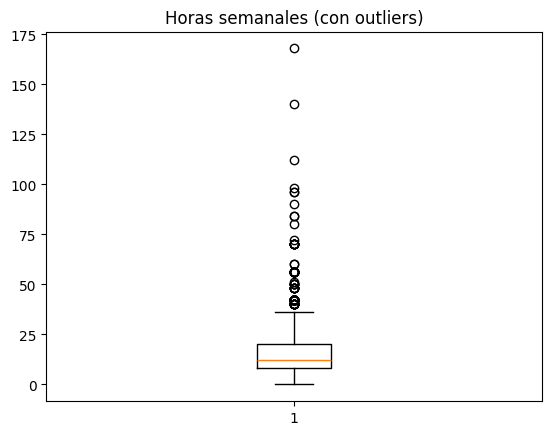

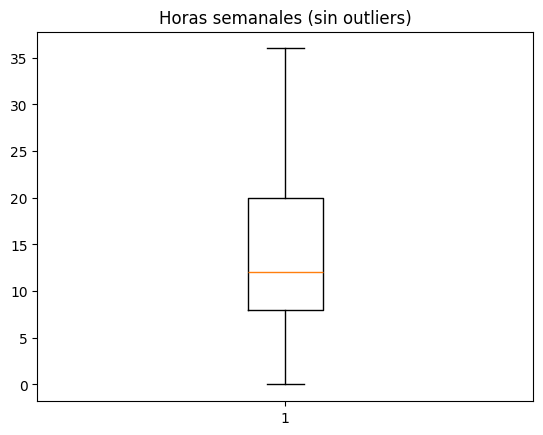

In [36]:
# Tratamos outliers del la columna HoursPerWeek
plt.boxplot(sc2DFImputed['HoursPerWeek'])
plt.title('Horas semanales (con outliers)')
plt.show()
for i in sc2DFImputed['HoursPerWeek']:
    q1 = sc2DFImputed['HoursPerWeek'].quantile(0.25)
    q3 = sc2DFImputed['HoursPerWeek'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    if i < lower_bound or i > upper_bound:
        # A los outliers los reemplazamos por la media o promedio
        sc2DFImputed['HoursPerWeek'] = sc2DFImputed['HoursPerWeek'].replace(i, np.mean(sc2DFImputed['HoursPerWeek']))
plt.boxplot(sc2DFImputed['HoursPerWeek'])
plt.title('Horas semanales (sin outliers)')
plt.show()

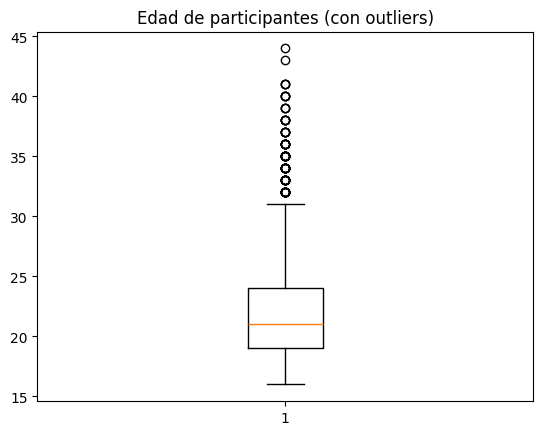

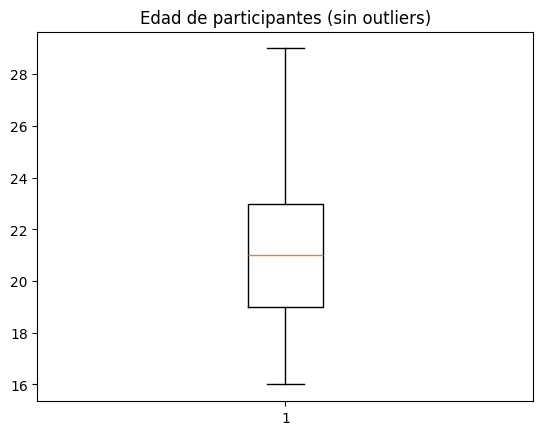

In [37]:
# Tratamos outliers del la columna Age
plt.boxplot(sc2DFImputed['Age'])
plt.title('Edad de participantes (con outliers)')
plt.show()
for i in sc2DFImputed['Age']:
    q1 = sc2DFImputed['Age'].quantile(0.25)
    q3 = sc2DFImputed['Age'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    if i < lower_bound or i > upper_bound:
        # A los outliers los reemplazamos por la media o promedio
        sc2DFImputed['Age'] = sc2DFImputed['Age'].replace(i, np.mean(sc2DFImputed['Age']))
plt.boxplot(sc2DFImputed['Age'])
plt.title('Edad de participantes (sin outliers)')
plt.show()

#### 2.1.3. **Algunos gráficos**

##### **Pregunta 1**: ¿Cuál es la distribución de jugadores según liga?

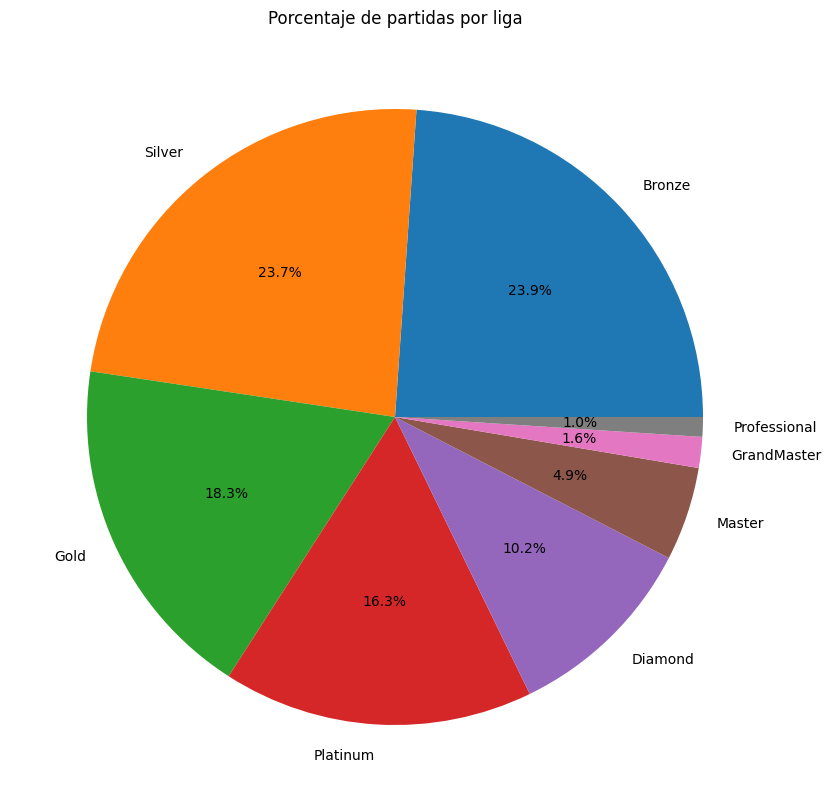

In [38]:
# Libreria con categorías de liga
league_categories = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster', 'Professional']

# Grafico de tortas del porcentaje de partidas por liga (LeagueIndex)
plt.figure(figsize=(10, 10))
plt.pie(sc2DFImputed['LeagueIndex'].value_counts(), labels=league_categories, autopct='%1.1f%%')
plt.title('Porcentaje de partidas por liga')
plt.show()

In [39]:
# Listamos de mayor a menor la cantidad de partidas por liga
leagueIndex = sc2DFImputed['LeagueIndex'].astype(int)
leagueIndex = leagueIndex.astype(str)
leagueIndex = leagueIndex.replace({'1': 'Master', '2': 'Diamond', '3': 'Platinum', '4': 'Bronze', '5': 'Silver', '6': 'Gold', '7': 'Professional', '8': 'GrandMaster'})
print('Cantidad de partidas por liga:')
print(leagueIndex.value_counts())

Cantidad de partidas por liga:
LeagueIndex
Bronze          811
Silver          806
Gold            621
Platinum        553
Diamond         347
Master          167
GrandMaster      55
Professional     35
Name: count, dtype: int64


**Respuesta:** Más de 2/3 de las partidas multijugador de Starcraft II se realizan en 4 ligas: Bronze, Silver, Gold y Platinum.

##### **Pregunta 2:** ¿Cuál es la distribución de jugadores según edad en cada una de las ligas?

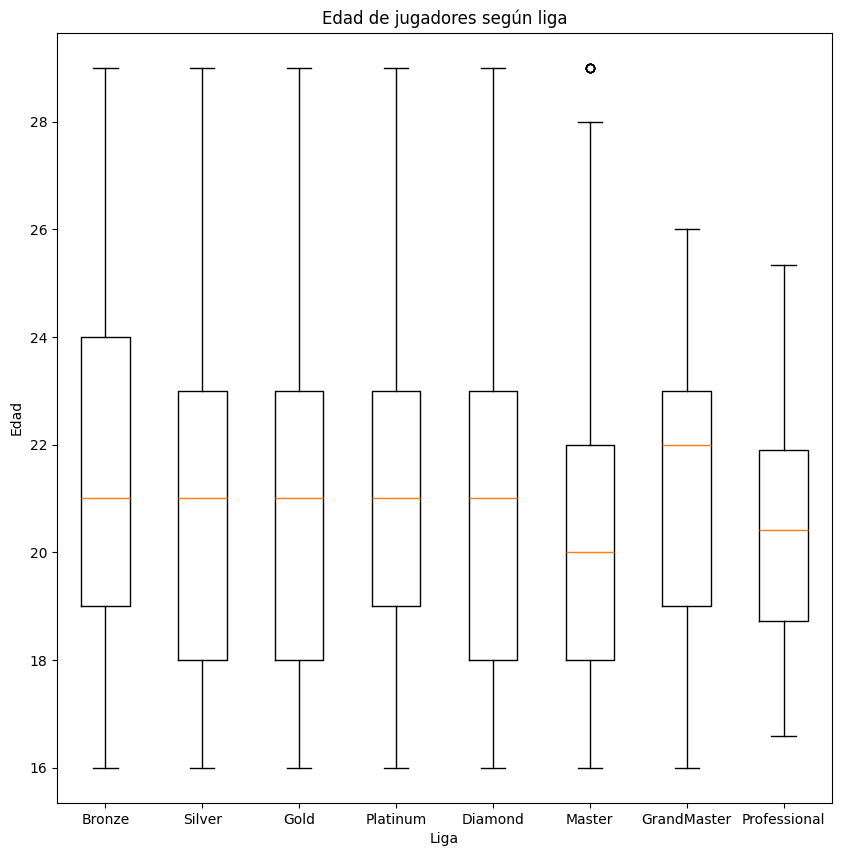

In [40]:
# Horas semanales jugadas según Edad
league_categories = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster', 'Professional']
sc2DFImputed_copy = sc2DFImputed.copy()
sc2DFImputed_copy['LeagueCategory'] = sc2DFImputed_copy['LeagueIndex'].map(dict(enumerate(league_categories, 1)))
plt.figure(figsize=(10, 10))
plt.boxplot([sc2DFImputed_copy[sc2DFImputed_copy['LeagueCategory'] == league]['Age'] for league in league_categories], labels=league_categories)
plt.title('Edad de jugadores según liga')
plt.xlabel('Liga')
plt.ylabel('Edad')
plt.show()


**Respuesta:** Es posible notar que existe una relación más o menos equitativa en la edad de los jugadores de las distintas ligas. La única tendencia que es posible apreciar es que entre más avanzado es el nivel o la dificultad de la liga (especialmente GrandMaster y Professional), menor es la diferencia de edad entre el percentil más alto y el más bajo.  

##### **Pregunta 3:** ¿Cuál es la distribución de horas semanales jugadas?

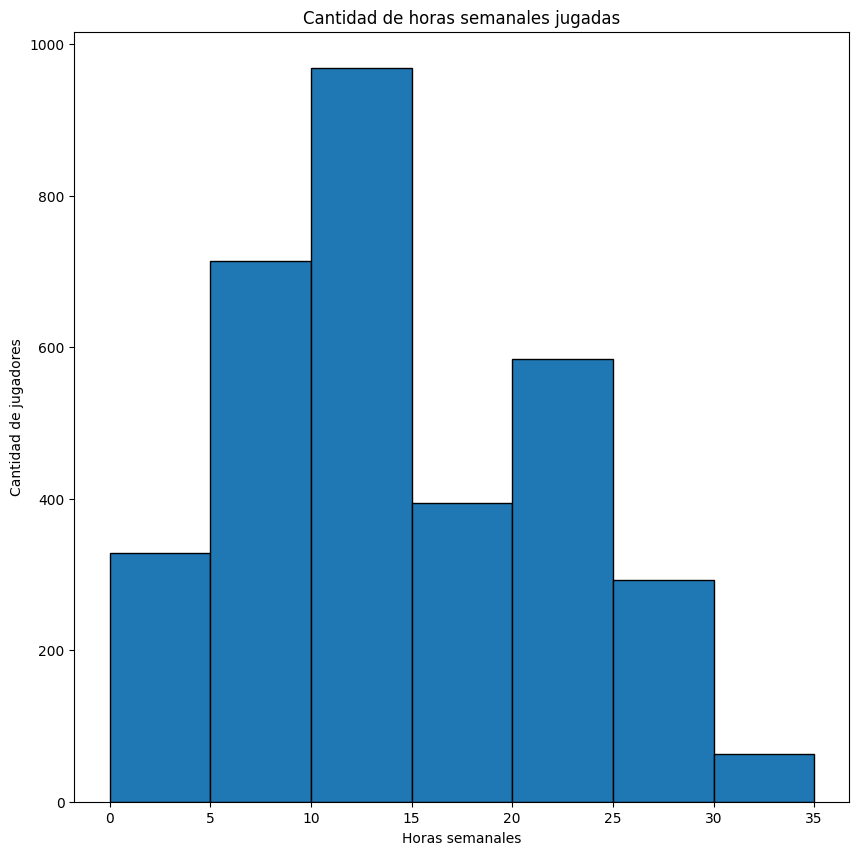

In [41]:
# Grafico de barras de la cantidad de horas semanales jugadas (HoursPerWeek)
hours_bins = np.arange(0, 40, 5)
plt.figure(figsize=(10, 10))
plt.hist(sc2DFImputed['HoursPerWeek'], bins=hours_bins, edgecolor='black')
plt.xticks(hours_bins)
plt.title('Cantidad de horas semanales jugadas')
plt.xlabel('Horas semanales')
plt.ylabel('Cantidad de jugadores')
plt.show()

**Respuesta:** La mayoría de jugadores practica entre 10 y 15 horas semanales.

### 2.2. **Análisis y procesamiento**

#### 2.2.1. **Encoding**

Tal como se indicó anteriormente, debido a que nuestro dataset, si bien contempla una variable categórica (LeagueIndex), como esta ya se encuentra categorizada con valores enteros, no será necesario someter nuestro dataset a un proceso de encoding.

#### 2.2.2. **Escalamiento**

In [42]:
# Escalando nuestro dataset con Standard Scaler
StdScaler = StandardScaler()
sc2DFStandardScaled = StdScaler.fit_transform(sc2DFImputed)
sc2DFStandardScaled = pd.DataFrame(sc2DFStandardScaled)
sc2DFStandardScaled.columns = sc2DFImputed.columns
sc2DFStandardScaled.head()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,0.537805,1.833603,-0.530392,0.102971,-1.261487,-0.148288,-0.684207,0.069596,0.012949,1.397121,-0.152880,-0.590876,0.014150,-0.725356,0.703205,-1.517198,-0.535071,-0.534970,1.309232
1,0.537805,0.596636,-0.530392,0.211244,0.510322,-0.188288,-0.507395,1.180308,0.119380,0.850859,-0.140422,-0.534754,0.059097,1.132317,0.311824,0.079195,-0.535071,0.247699,-0.769905
2,-0.121346,0.076335,-0.530392,-0.048611,-0.403978,-0.605182,-0.168988,1.177697,0.196243,-0.541384,0.440045,0.718570,-2.095620,-0.598222,-0.553320,-0.877020,-0.535071,0.176773,0.351174
3,-0.780497,-0.640330,0.720371,-0.037783,0.176653,-0.617967,-0.713535,-0.271376,0.413781,0.322194,-0.323504,-0.102298,0.094094,-0.924594,-1.166793,-0.402964,-0.535071,0.911367,0.306149
4,-0.780497,0.171398,-0.530392,-0.032370,0.412501,-0.598572,-0.205645,-0.592757,2.496706,-1.103253,-0.646787,0.214592,-1.836856,0.072933,0.275210,-0.305722,-0.535071,-0.462197,-0.945346


In [43]:
# Escalando nuestro dataset con MinMax Scaler
MinMaxScaler = MinMaxScaler()
sc2DFMinMaxScaled = MinMaxScaler.fit_transform(sc2DFImputed)
sc2DFMinMaxScaled = pd.DataFrame(sc2DFMinMaxScaled)
sc2DFMinMaxScaled.columns = sc2DFImputed.columns
sc2DFMinMaxScaled.head()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,0.571429,0.846154,0.277778,0.002997,0.025471,0.081580,0.125384,0.036382,0.097089,0.571893,0.137750,0.231696,0.246026,0.173358,0.260158,0.150420,0.0,0.000000,0.281758
1,0.571429,0.538462,0.277778,0.004997,0.229089,0.076675,0.148079,0.097391,0.107017,0.497565,0.138811,0.240077,0.251083,0.390529,0.220117,0.366717,0.0,0.067312,0.089822
2,0.428571,0.409038,0.277778,0.000197,0.124017,0.025554,0.191515,0.097248,0.114187,0.308128,0.188267,0.427238,0.008677,0.188221,0.131607,0.237158,0.0,0.061212,0.193314
3,0.285714,0.230769,0.555556,0.000397,0.190743,0.023987,0.121620,0.017653,0.134480,0.425632,0.123212,0.304656,0.255020,0.150066,0.068845,0.301388,0.0,0.124390,0.189158
4,0.285714,0.432685,0.277778,0.000497,0.217847,0.026365,0.186810,0.000000,0.328786,0.231676,0.095668,0.351978,0.037788,0.266682,0.216371,0.314564,0.0,0.006259,0.073626


¿Cuál se aplica mejor a nuestro dataset? MinMaxScaler resulta un mejor escalador para nuestro dataset, debido a lo siguiente:
* Conserva la forma de la distribución original, ya que no asume una distribución específica de las características y busca mantener la relación lineal entre las características. Así podemos notar, por ejemplo, que nuestros datos no contemplan valores negativos, los cuales no son posibles para los datos que estamos tratando.
* Es menos sensible a los valores atípicos en comparación con StandardScaler.

#### 2.2.3. **Correlación**

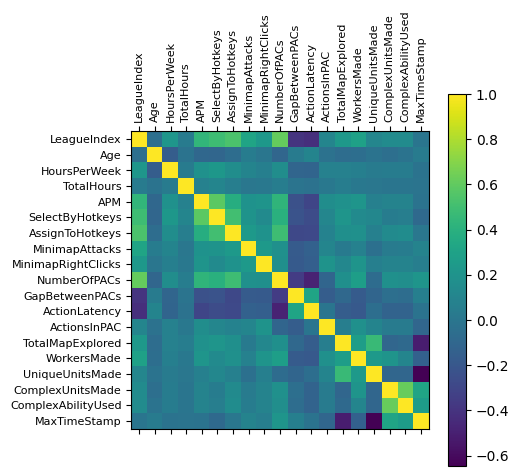

In [44]:
# Aplicaremos un mapa de calor con nuestras variables
plt.matshow(sc2DFMinMaxScaled.corr())
plt.xticks(range(sc2DFMinMaxScaled.shape[1]), sc2DFMinMaxScaled.columns, fontsize=8, rotation=90)
plt.yticks(range(sc2DFMinMaxScaled.shape[1]), sc2DFMinMaxScaled.columns, fontsize=8)
plt.colorbar()
plt.show()

In [45]:
# Vamos a listar las relaciones entre las variables, ordenadas desde la más fuerte a la más débil
list = sc2DFMinMaxScaled.corr().unstack().sort_values(ascending=False).drop_duplicates()
pd.set_option('display.max_rows', None)
print(list)

LeagueIndex         LeagueIndex           1.000000
ComplexAbilityUsed  ComplexUnitsMade      0.616680
NumberOfPACs        LeagueIndex           0.612192
SelectByHotkeys     APM                   0.586837
AssignToHotkeys     LeagueIndex           0.531125
                    SelectByHotkeys       0.504526
LeagueIndex         SelectByHotkeys       0.490599
AssignToHotkeys     NumberOfPACs          0.486729
UniqueUnitsMade     TotalMapExplored      0.471744
LeagueIndex         APM                   0.438734
NumberOfPACs        APM                   0.433003
SelectByHotkeys     NumberOfPACs          0.398505
AssignToHotkeys     APM                   0.381857
MaxTimeStamp        ComplexUnitsMade      0.314334
GapBetweenPACs      ActionLatency         0.313219
LeagueIndex         MinimapAttacks        0.312543
WorkersMade         LeagueIndex           0.295643
                    NumberOfPACs          0.277891
                    TotalMapExplored      0.272495
MaxTimeStamp        ComplexAbil

**Conclusión:** Las mejores correlaciones (sobre el 50%) que podemos identificar son:

**1)** La relación entre las habilidades que requieren instrucciones de puntería específicas utilizadas por marca de tiempo (***ComplexAbilityUsed***) y el número de fantasmas, infestadores y altos templarios entrenados por marca de tiempo. (***ComplexUnitsMade***), con un **61,66%**.

**2)** La relación entre el número de PACs por marca de tiempo (***NumberOfPACs***) y la liga (***LeagueIndex***), con un **61,21%**.

**3)** La relación entre el número de selecciones de unidades o edificios realizadas mediante teclas de acceso rápido por marca de tiempo (***SelectByHotkeys***) y el número de acciones por minuto (***APM***), con un **58,68%**.

**4)** La relación entre el número de unidades o edificios asignados a teclas de acceso rápido por marca de tiempo (***AssignToHotkeys***) y la liga (***LeagueIndex***), con un **53,11%**.

**5)** La relación entre el número de unidades o edificios asignados a teclas de acceso rápido por marca de tiempo (***AssignToHotkeys***) y el número de selecciones de unidades o edificios realizadas mediante teclas de acceso rápido por marca de tiempo (***SelectByHotkeys***), con un **50,45%**.
